In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In [3]:
# load the pokemon data set
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## 1.0 Color Palettes

Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider:
* Qualitative
* Sequential
* Diverging

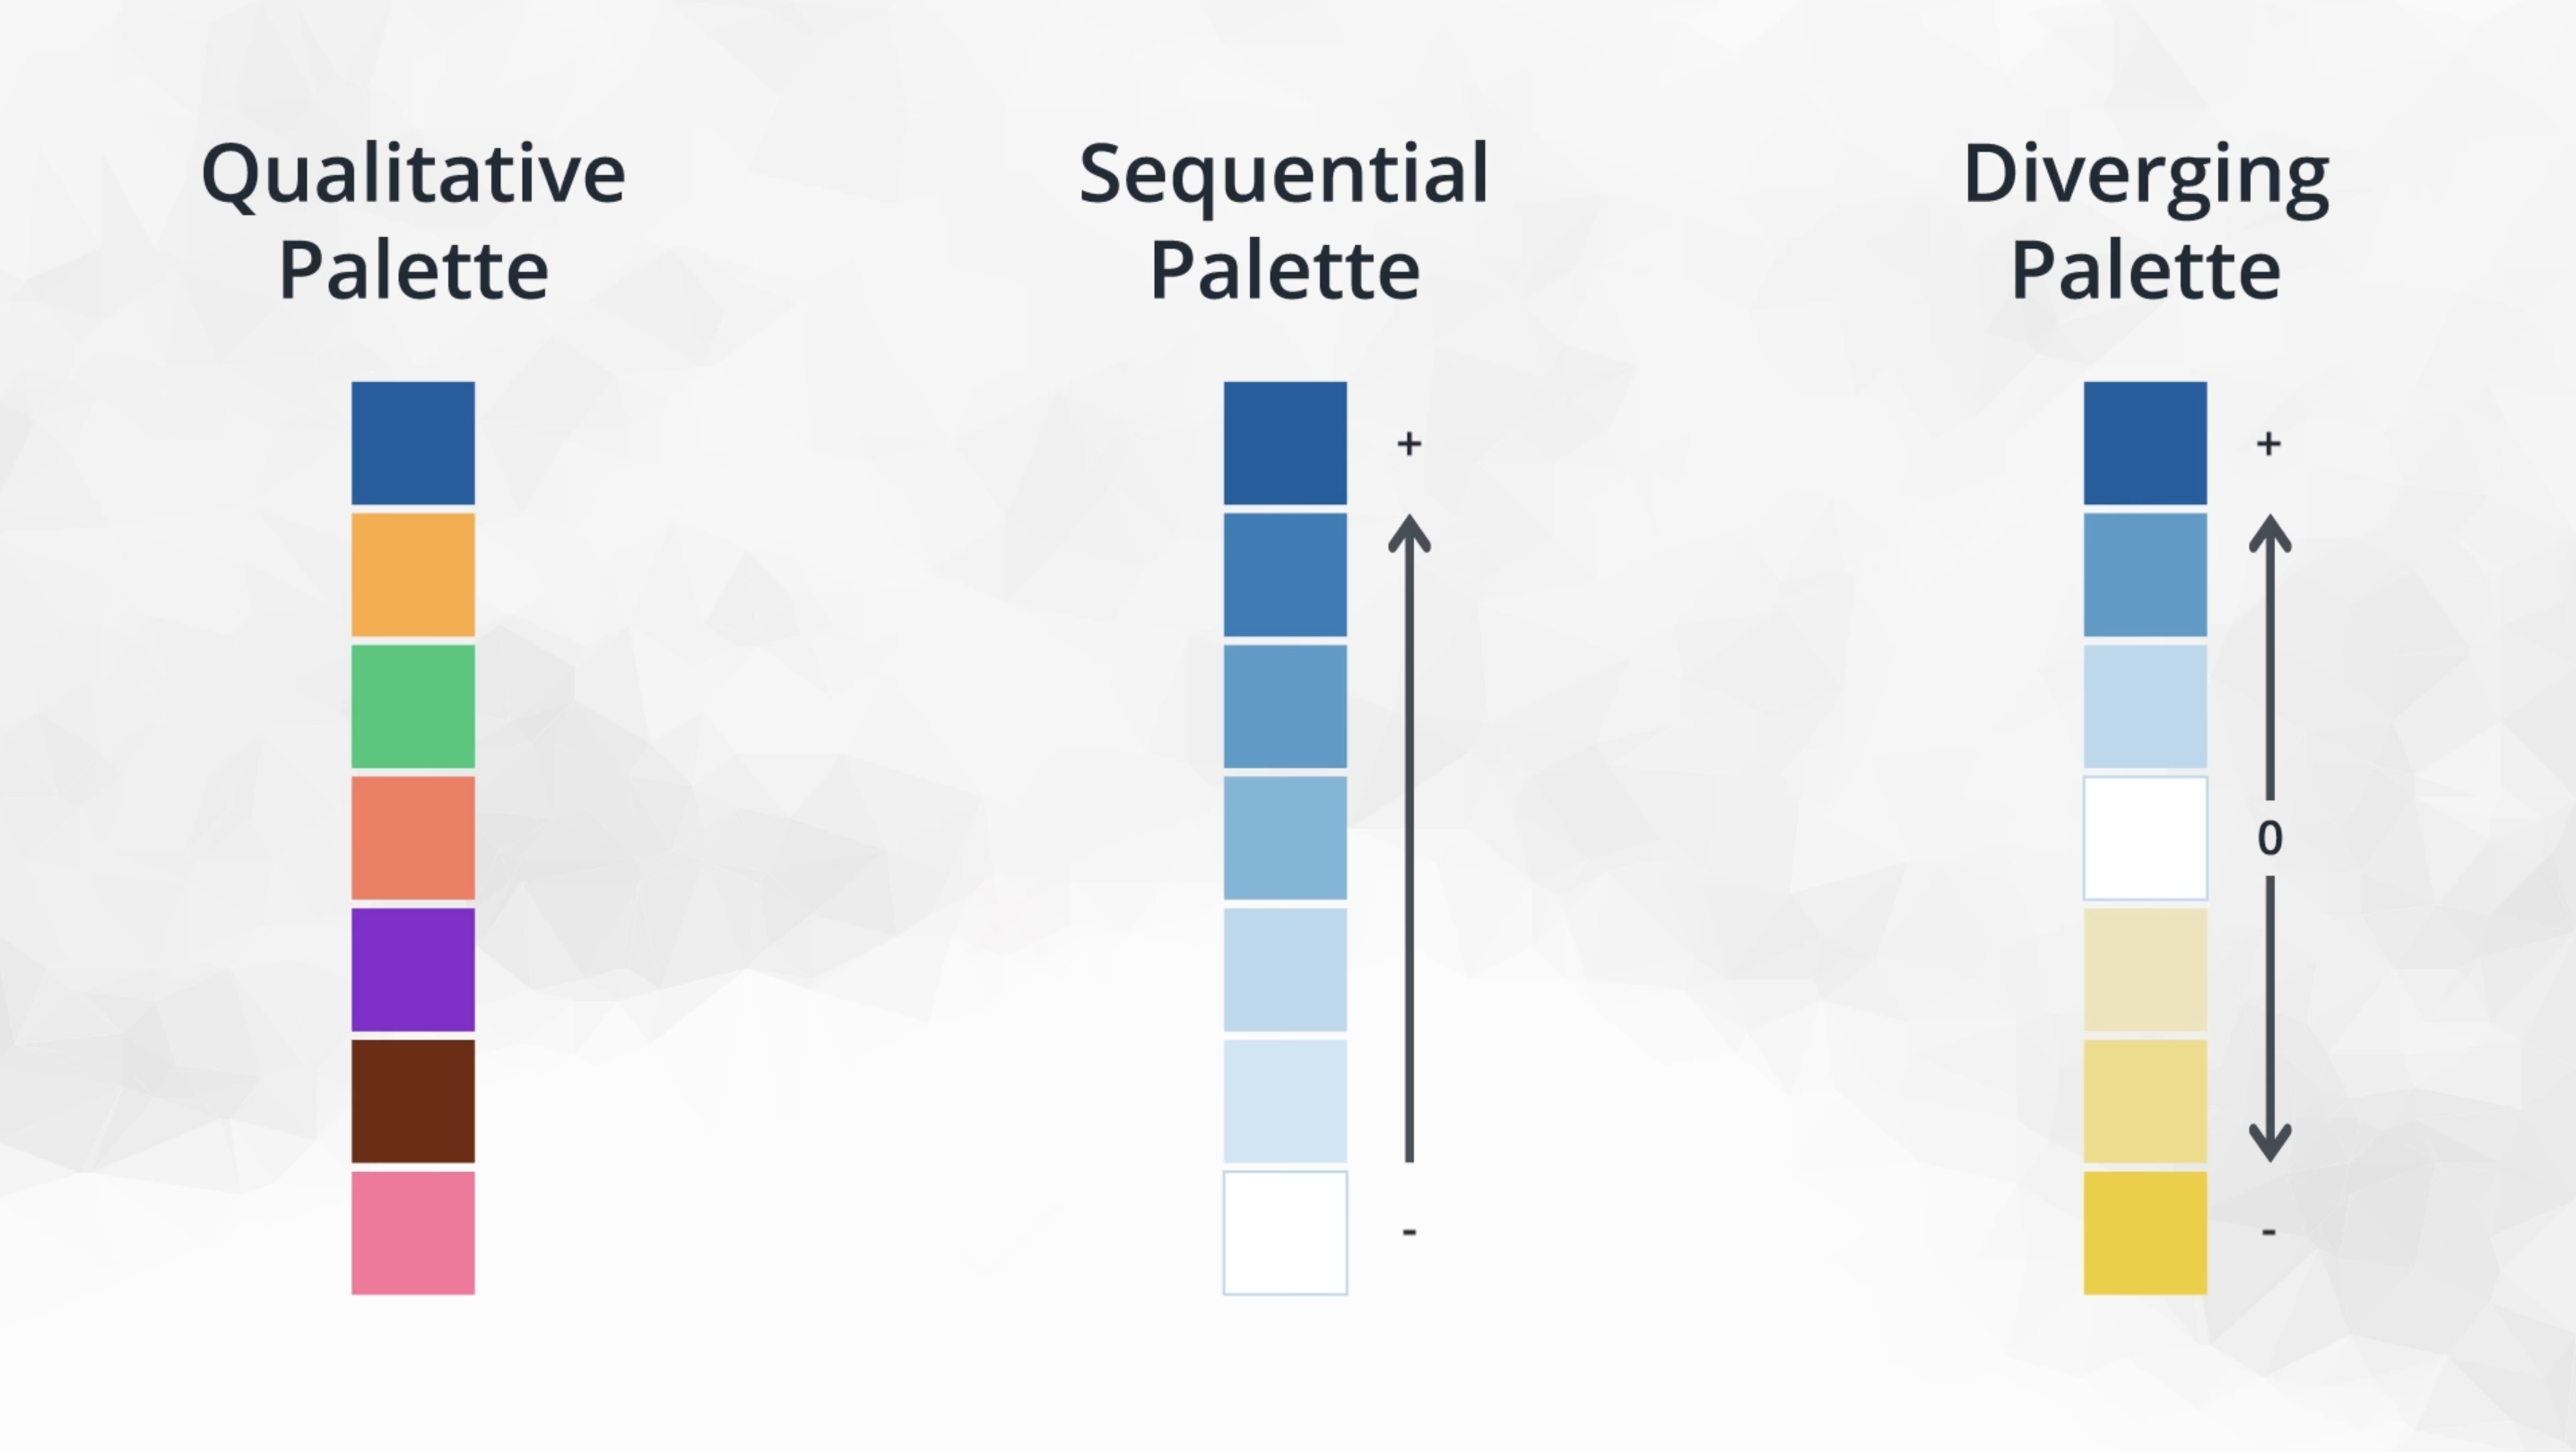

**a. Qualitative palettes**
> Qualitative Palettes are built for nominal-type data. This is the palette class taken by the default palette.

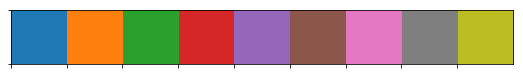

In [2]:
# Qualitative
sb.palplot(sb.color_palette(n_colors=9))

>In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

**b. Sequential** 
>For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. In a sequential palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

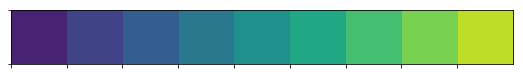

In [3]:
# Sequential
sb.palplot(sb.color_palette('viridis', 9))

**c. Divergent Palette**
> Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is a meaningful zero or center value for the variable, you may want to consider using a diverging palette. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

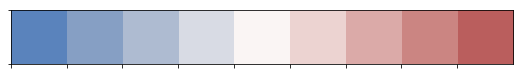

In [4]:
# Divergent palette
sb.palplot(sb.color_palette('vlag', 9))

### 2.0 Selecting Color Palettes

If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. This part of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

* Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
* Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
* Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the "palette" parameter, and in scatter through the "cmap" parameter as shown below:

In [4]:
# create a new column name 'type' that will have four variables
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, var_name = 'type_level', value_name = 'type').dropna()
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon', 'grass', 'poison'])]


### 3.0 Plotting a Scatter Plot

#### 3.1.1 Scatter Plot Using Qualitative Palettes: Before Log Transformation

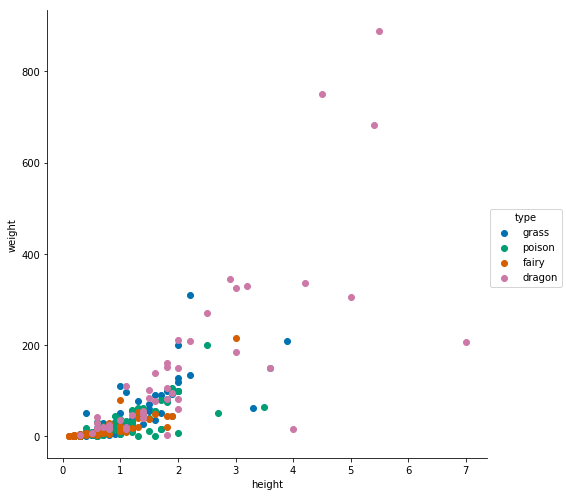

In [5]:
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 7,
                 palette = 'colorblind')
g.map(plt.scatter, 'height', 'weight')
g.add_legend();

#### 3.1.2 Scatter Plot After Log Transformation

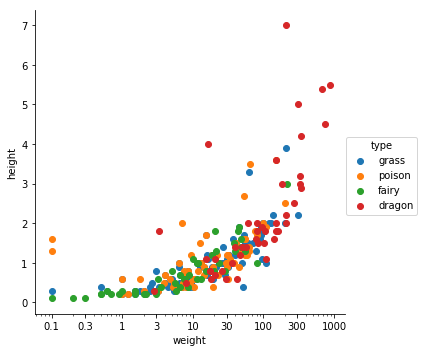

In [20]:
# plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();

#### 3.2 Scatter Plot with Sequential Colors

**Task**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship. We'll use sequentialcolor palette because we're looking for defense level.

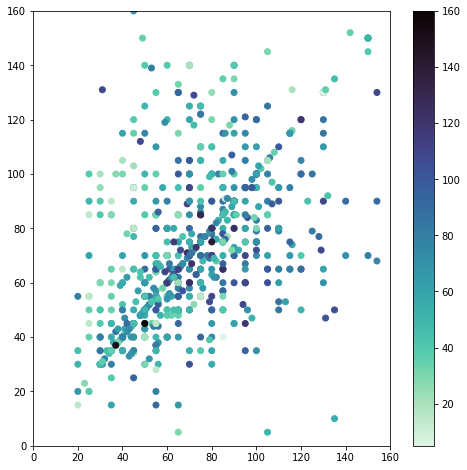

In [6]:
# scatter plot
plt.figure(figsize=(8,8))
plt.scatter(data = pokemon, x = 'special-defense', y = 'defense', c = 'speed',
            cmap = 'mako_r')
plt.xlim(0,160)
plt.ylim(0,160)
plt.colorbar();

When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


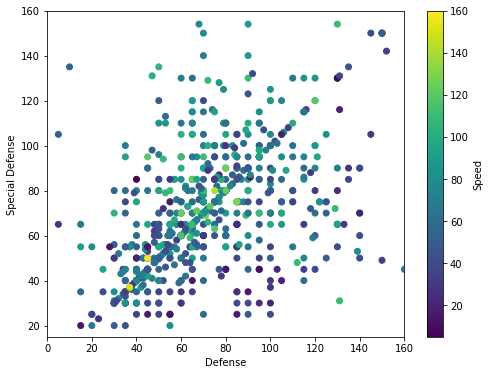

In [6]:
# run this cell to check your work against ours
encodings_solution_1()